## Your Name Here
## Example-Brief
## Lab #1
# more here

Some preliminary set up code (don't worry too much about this now):

In [ ]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns



*Let*'s look a survey of people's favorite candies.  Grab the data online ...

In [ ]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv'
df = pd.read_csv(url)

Look at the data

In [ ]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


QUESTION 1.   1-- Choose one variable, look at its distribution (mean, sd, median, min, max), and plot it via a histogram.  Explain what you take away from looking at the variable.    In our case, let's look at the distribution of a varible, chocolate.  This variable is a categorical/nominal variable, so we will tabulate it.  About half of the candies under consideration have chocolate (chocolate=1), while the other half do not (chocolate=0).  We will start with the raw counts ...

In [ ]:
df.chocolate.value_counts().sort_index()

chocolate
0    48
1    37
Name: count, dtype: int64

Now, we will look at it in percentage terms:

In [ ]:
df.chocolate.value_counts(normalize=True).sort_index()*100


chocolate
0    56.470588
1    43.529412
Name: proportion, dtype: float64

Here is a histogram of this data:

<Axes: xlabel='chocolate', ylabel='Count'>

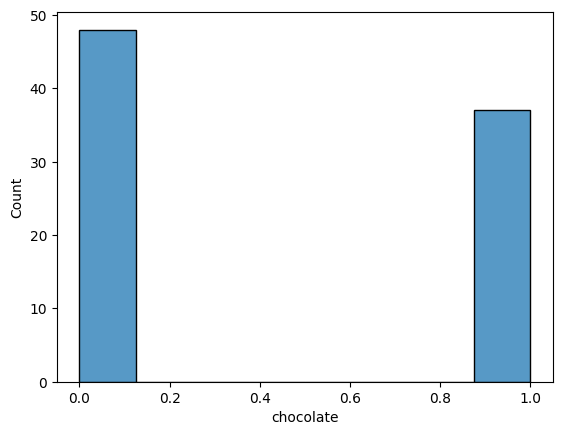

In [ ]:
sns.histplot(data=df, x="chocolate")

The big conclusion here is that the candies selected are about equal in terms of being chocolate vs. non-chocolate, which seems reasonable, based on what I see in stores.

Now, let's do a second variable to look at too.  (You only need to look at one variable in Q1, but let's do a second variable that is more interval-ratio or continuous, so we can see you can use the describe function here: Sugariness Percentile.  Let's start off with a simple histogram.

<Axes: xlabel='sugarpercent', ylabel='Count'>

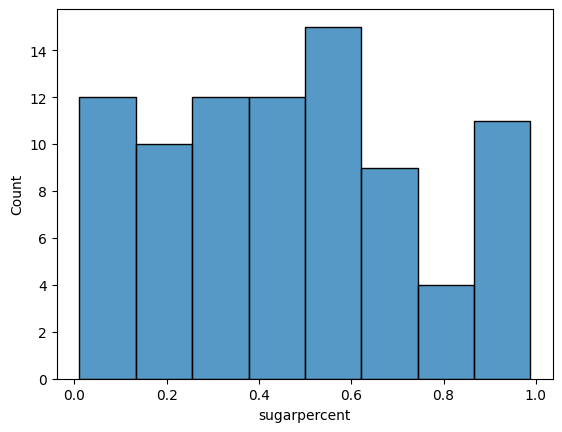

In [ ]:
sns.histplot(data=df, x="sugarpercent")

I included chocolate here in the describe, so you can see multiple variables at once, but we are really just looking at Sugariness, the percentile of sugariness in the candy.  

In [ ]:
df[['chocolate', 'sugarpercent']].describe()

,chocolate,sugarpercent
count,85.000000,85.000000
mean,0.435294,0.478647
std,0.498738,0.282778
min,0.000000,0.011000
25%,0.000000,0.220000
50%,0.000000,0.465000
75%,1.000000,0.732000
max,1.000000,0.988000


The big conclusion on this variable is that the distribution of percentiles of sugar is approximately even (or uniform) over the full range of the data
The median and mean are roughly 50%, which is what you’d expect if percentiles are evenly distributed (and the IQR is also about 50%, which is what you’d expect of the 25 to 75 range).  The min is approximately 0 and max is approximately 100, which is expected too, since percentiles cannot be out of the range from 0-100.


QUESTION 2.  Choose some continuous-ish variable, and calculate its mean and standard deviation by some grouping variable.  Explain what conclusion you draw from this analysis.  We will ask:  How sugary is the candy, on average, by whether it has chocolate or not?  Chocolate has 51.2% sugariness percentile vs. non-chocolate candy is only at the 45.2% sugariness percentile, on average.  We see that despite having a higer average, the chocolate have a narrower standard deviation, which suggests chocolate is pretty uniform in its sugariness.  

In [ ]:
df.groupby(['chocolate'])['sugarpercent'].mean()

chocolate
0    0.452937
1    0.512000
Name: sugarpercent, dtype: float64

In [ ]:
df.groupby(['chocolate'])['sugarpercent'].std()

chocolate
0    0.310936
1    0.241524
Name: sugarpercent, dtype: float64

Let's graph it, simply.  We see the much wider range of sugariness for the non-chocolate candies.

<Axes: xlabel='chocolate', ylabel='sugarpercent'>

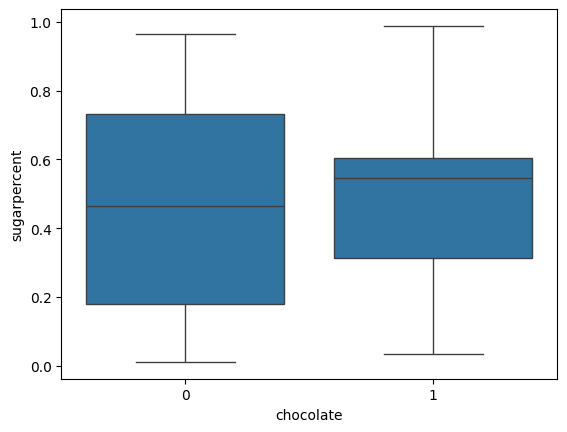

In [ ]:
sns.boxplot(data=df, x="chocolate", y="sugarpercent")

The big conclusion here is that, on average, chocolate is a higher percentile of sugar (51st percentile) than the non-chocolate (45th percentile)
But chocolate has a much lower standard deviation (24) vs. non-chocolate (31), so chocolate candy is usually the same sweetness, but non-chocolate candy varies more (its IQR is double too, 55 vs. 29)


QUESTION 3. What about 2 categorical variables.  Can a candy be both chocolatey and fruity at the same time?  I would think maybe, sometimes.  But the answer is NO.

In [ ]:
pd.crosstab(df.fruity, df.chocolate, normalize='columns')*100


chocolate,0,1
fruity,,
0,22.916667,97.297297
1,77.083333,2.702703


Chocolate things have a very different fruity profile than non-chocolate things.  Specifically, For chocolate candy, it is almost never fruity (only 2.7% of the time).  For non-chocolate candy, it is usually fruity (77%)


We can visualize this relationship too:

<Axes: xlabel='chocolate'>

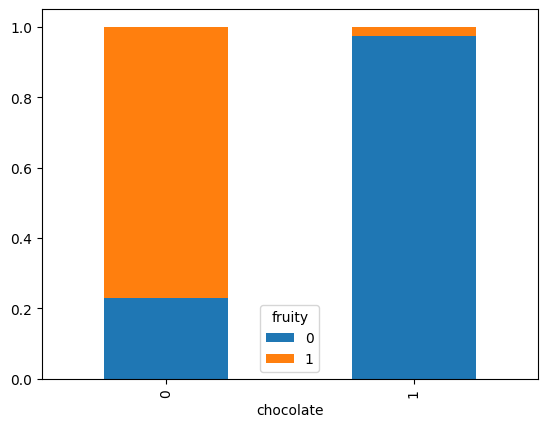

In [ ]:
# Group by 'chocolate' and 'fruity', then count the occurrences
chocolate_fruity_counts = df.groupby(['chocolate', 'fruity']).size()

# Group by 'chocolate' only and count the occurrences
chocolate_counts = df.groupby('chocolate').size()

# Calculate the percentage
d_pct = chocolate_fruity_counts / chocolate_counts

# Unstack and plot the data
d_pct.unstack().plot(kind='bar', stacked=True)